### Model Classification and Evaluation

In [2]:
# First, let's import the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set the seed of the pseudo randomization to guarantee that results are reproducible between executions
RANDOM_SEED = 2023
np.random.seed(RANDOM_SEED)

In [4]:
# Pandas provides built-in functions to load text files into DataFrames.
df = pd.read_csv("breast-cancer.csv")
df.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# Total size of the dataset
df.shape

(569, 32)

In [7]:
# Variable types
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

The diagnosis features Benign(B) and Malignant(M) are selected as target variables. The radius mean and perimeter mean are selected as numerical features.  

In [8]:
# Transforming the binary feature from `diagnosis` into numerical values
df["diagnosis"] = df["diagnosis"].map({"M":0, "B":1})

In [9]:
feature_matrix = ["radius_mean", "perimeter_mean"]
X = df[feature_matrix]
y = df["diagnosis"]
X

,radius_mean,perimeter_mean
0,17.99,122.80
1,20.57,132.90
2,19.69,130.00
3,11.42,77.58
4,20.29,135.10
...,...,...
564,21.56,142.00
565,20.13,131.20
566,16.60,108.30
567,20.60,140.10


In [10]:
# Let's create a function to see the dataset easier
def visualize_dataset_with_target_class(X, y, title=""):
    """
    Input:
        X: (np.array[N,2]) - The features from the data
        y: (np.array[N,1]) - The corresponding target class of each sample
    Returns:
        A plot with the dataset and the colors of the respective class
    """
    plt.scatter(x = X[:,0], y = X[:,1], c=y, s=30)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title(title)
    plt.grid(True)
    return plt.show()

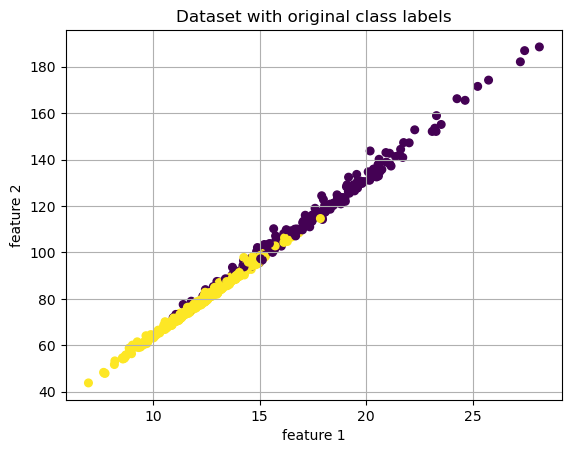

In [11]:
visualize_dataset_with_target_class (X.to_numpy(), y.to_numpy(), title = "Dataset with original class labels")

In [12]:
# Normalize each dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X = X_normalized
X

array([[0.52103744, 0.54598853],
       [0.64314449, 0.61578329],
       [0.60149557, 0.59574321],
       ...,
       [0.45525108, 0.44578813],
       [0.64456434, 0.66553797],
       [0.03686876, 0.02853984]])

# Classification 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

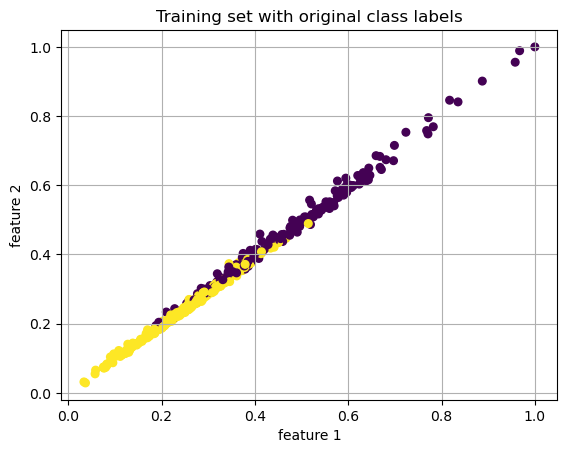

In [14]:
# Plot the TRAINING set
visualize_dataset_with_target_class(X_train, y_train.to_numpy(), title="Training set with original class labels")

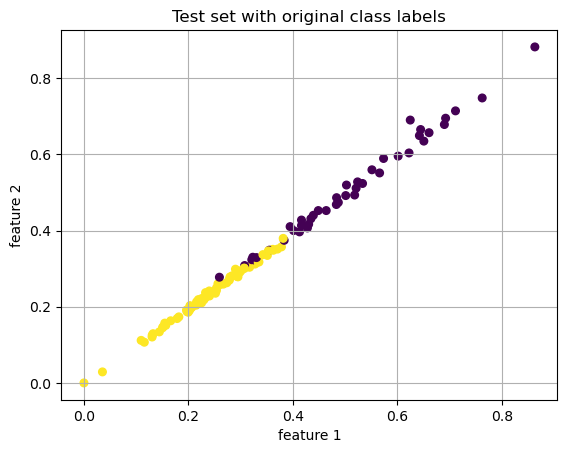

In [15]:
# Plot the TEST set 
visualize_dataset_with_target_class(X_test, y_test.to_numpy(), title="Test set with original class labels")

# Decision Tree (DT)

In [16]:
from sklearn.tree import DecisionTreeClassifier
# 1) Initialize an object containing the algorithm
dt_classifier = DecisionTreeClassifier(max_depth=3)     # Criterion split by default is gini-index, which is ok

# 2) Apply the algorithm using the training data
dt_classifier.fit(X_train, y_train)   ### NOTE here that we also used the labels `y`, in clustering algorithms we only pass `X`

# 3) Generate class labels for new unseen data (predictions)
y_predicted = dt_classifier.predict(X_test)

print("According to the DT classifier, the class labels in the test set are: ", y_predicted)

According to the DT classifier, the class labels in the test set are:  [1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [17]:
# Let's create a function to visualize the true labels and predicted labels easier
def visualize_and_compare_classifications(X, real_y, predicted_y, title=""):
    """
    Input:
        X: (np.array[N,2]) - The dataset to visualize (only 2 features)
        real_y: (np.array[N,1]) - Real class labels from X
        predicted_y: (np.array[N,1]) - Predicted class labels from X
    Returns:
        A plot with two axes showing the real and the predicted labels
    """

    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    
    # First plot contains real class labels
    ax = axes[0]
    ax.scatter(x = X[:,0], y = X[:,1], c=real_y, s=30)
    ax.set(xlabel="feature 1",ylabel="feature 2",title="Real labels")
    ax.grid(True)

    # Second plot contains predicted class labels
    ax = axes[1]
    ax.scatter(x = X[:,0], y = X[:,1], c=predicted_y, s=30)
    ax.set(xlabel="feature 1",ylabel="feature 2",title="Predicted labels")
    ax.grid(True)

    if title != "":
        plt.suptitle(title)

    return plt.show()

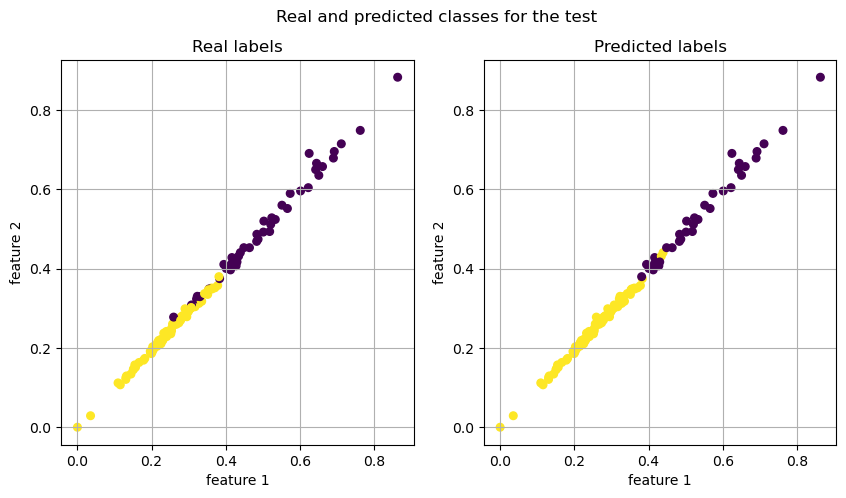

In [18]:
visualize_and_compare_classifications(X_test, y_test.to_numpy(), y_predicted, title="Real and predicted classes for the test")

In [19]:
# Let's build a function to see the decision boundary of a classifier
def visualize_and_compare_decision_boundaries(X, real_y, classifier, title="", step=0.005):
    """
    Function based on the example from 
    https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    
    Input:
        X: (np.array[N,2]) - The dataset to visualize (only 2 features)
        real_y: (np.array[N,1]) - Real class labels from X
        classifier: (sklearn-object) - Object that classifies the data
    Returns:
        A plot with two axes showing the decision boundaries
    """

    # Plotting decision regions
    x_min, x_max = X[:, 0].min(), X[:, 0].max() * 1.1
    y_min, y_max = X[:, 1].min(), X[:, 1].max() * 1.1

    # We are creating a 2D grid of test data to be able to show the decision boundaries
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

    # And we apply the classifier to each sample in the 2D grid to see what would the prediction
    # be at each specific point of the space
    Z = classifier.predict(np.column_stack([xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    # Plot contains real class labels and 
    # the decision boundary created by the classifier
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(x = X[:,0], y = X[:,1], c=real_y, s=30, edgecolor="k", label="True class labels")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.grid(True); plt.legend()

    if title == "":
        plt.suptitle("True class labels and predicted decision boundary")
    else:
        plt.suptitle(title)

    return plt.show()

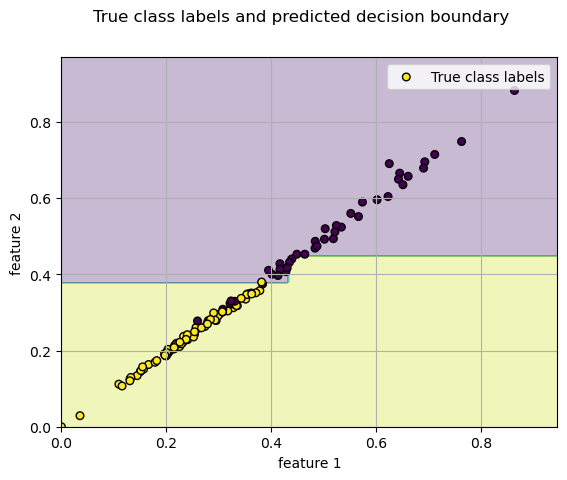

In [20]:
visualize_and_compare_decision_boundaries(X_test, y_test, dt_classifier)

# Random Forest (RF)

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=10)
rf_classifier.fit(X_train, y_train)
y_predicted = rf_classifier.predict(X_test)

print("According to the RF classifier, the class labels in the test set are: ", y_predicted)

According to the RF classifier, the class labels in the test set are:  [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0
 1 1 0]


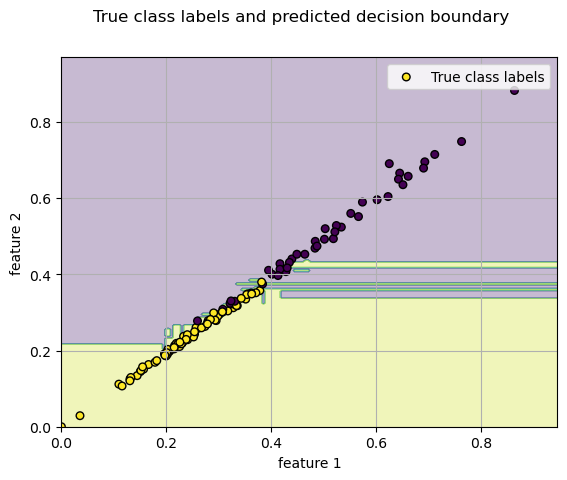

In [22]:
# Let's visualize the classification boundary of the Random Forest
visualize_and_compare_decision_boundaries(X_test, y_test, rf_classifier)

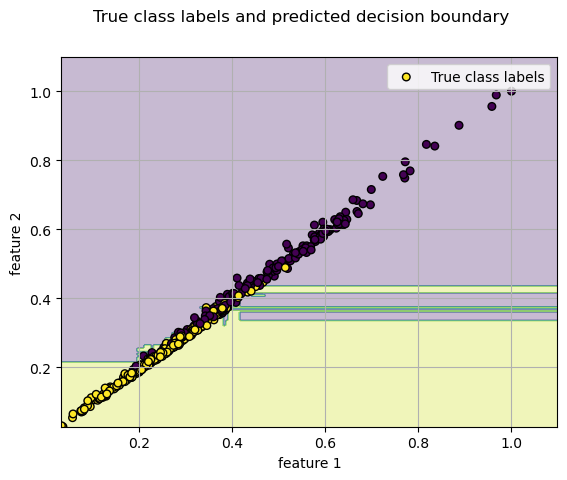

In [23]:
visualize_and_compare_decision_boundaries(X_train, y_train, rf_classifier)

# K-nearest neighbors (KNN)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)    # The default distance metric is Euclidean, which is usually ok.
knn_classifier.fit(X_train, y_train)
y_predicted = knn_classifier.predict(X_test)

C:\Users\yifru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\yifru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


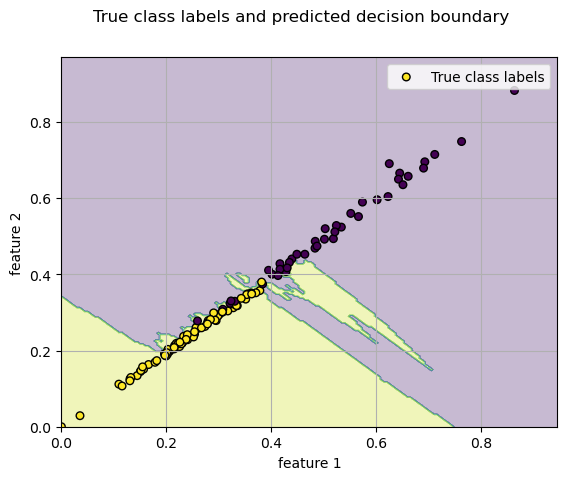

In [25]:
visualize_and_compare_decision_boundaries(X_test, y_test, knn_classifier)

# Homework 5 - Evaluation

For this analysis radius mean, texture mean, perimeter mean, smoothness mean, compactness mean, concavity mean,concave points mean, symmetry mean and fractional dimension mean are choosen. The target variable is diagnosis. 

In [26]:
# Select some of the existing features
df_filtered = df[["radius_mean","texture_mean","perimeter_mean", "area_mean", "smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","diagnosis"]]
df_filtered.describe(include="all")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,1.000000


In [27]:
df_filtered.shape

(569, 11)

In [28]:
df_filtered.dtypes

radius_mean               float64
texture_mean              float64
perimeter_mean            float64
area_mean                 float64
smoothness_mean           float64
compactness_mean          float64
concavity_mean            float64
concave points_mean       float64
symmetry_mean             float64
fractal_dimension_mean    float64
diagnosis                   int64
dtype: object

<AxesSubplot: >

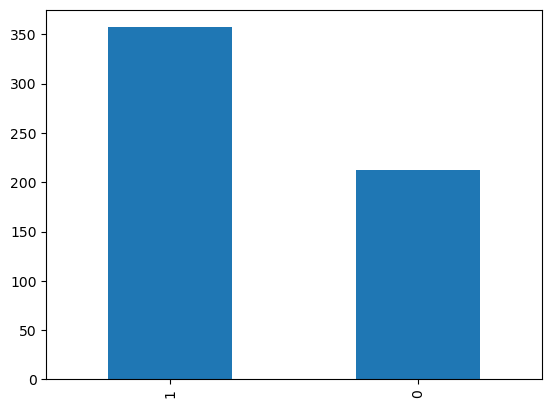

In [29]:
# Plot class balance
df_filtered["diagnosis"].value_counts().plot.bar()

In [30]:
# Data to be used for the classification task
df_filtered.sample(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
423,13.66,19.13,89.46,575.3,0.09057,0.1147,0.09657,0.04812,0.1848,0.06181,1
41,10.95,21.35,71.90,371.1,0.12270,0.1218,0.10440,0.05669,0.1895,0.06870,0
535,20.55,20.86,137.80,1308.0,0.10460,0.1739,0.20850,0.13220,0.2127,0.06251,0
471,12.04,28.14,76.85,449.9,0.08752,0.0600,0.02367,0.02377,0.1854,0.05698,1
56,19.21,18.57,125.50,1152.0,0.10530,0.1267,0.13230,0.08994,0.1917,0.05961,0
11,15.78,17.89,103.60,781.0,0.09710,0.1292,0.09954,0.06606,0.1842,0.06082,0
501,13.82,24.49,92.33,595.9,0.11620,0.1681,0.13570,0.06759,0.2275,0.07237,0
523,13.71,18.68,88.73,571.0,0.09916,0.1070,0.05385,0.03783,0.1714,0.06843,1
123,14.50,10.89,94.28,640.7,0.11010,0.1099,0.08842,0.05778,0.1856,0.06402,1
340,14.42,16.54,94.15,641.2,0.09751,0.1139,0.08007,0.04223,0.1912,0.06412,1


Now we will transform the pandas DataFrame into numerical Numpy arrays

In [31]:
# Separate the features X and the target variable y
df_filtered_X = df_filtered.drop(["diagnosis"], axis=1)
df_filtered_y = df_filtered["diagnosis"]

In [32]:
# Finally, we need transform from Pandas DataFrame to numerical Arrays, and store the column names
df_X = df_filtered_X.values
df_y = df_filtered_y.values

df_colnames = df_filtered_X.columns.values
print(df_colnames)

['radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean']


In [33]:
df_X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

In [34]:
df_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# Evaluation with cross validation

### Decision Tree

In [35]:
dt_classifier = DecisionTreeClassifier(max_depth=3)     # Criterion split by default is gini-index, which is ok

# 2) Apply the algorithm using the training data
dt_classifier.fit(X_train, y_train)   ### NOTE here that we also used the labels `y`, in clustering algorithms we only pass `X`

# 3) Generate class labels for new unseen data (predictions)
y_predicted = dt_classifier.predict(X_test)

In [36]:
from sklearn.model_selection import cross_validate

In [37]:
# Define the evaluation metrics to be returned by the cross-validation
scoring_metrics = ["accuracy", "precision_macro", "recall_macro", "f1_macro"] # Metrics of interest

# Execute the cross-validation
results_eval_dt = cross_validate(dt_classifier, df_X, df_y, cv=5, scoring=scoring_metrics)

In [38]:
results_eval_dt

{'fit_time': array([0.00499773, 0.00302529, 0.00400329, 0.00301766, 0.00298786]),
 'score_time': array([0.00699782, 0.00399709, 0.00400543, 0.00400066, 0.00508475]),
 'test_accuracy': array([0.86842105, 0.92982456, 0.9122807 , 0.95614035, 0.9380531 ]),
 'test_precision_macro': array([0.86111111, 0.94103194, 0.90324675, 0.95506181, 0.92973856]),
 'test_recall_macro': array([0.85768097, 0.9115624 , 0.91071429, 0.95039683, 0.94097921]),
 'test_f1_macro': array([0.85931715, 0.92297297, 0.9066492 , 0.95263814, 0.93459026])}

In [39]:
# Averaging the results over the 5-folds and store in a new dictionary
averaged_results_dt = {
                    "classifier_name": "DT"
                    }

# Populate the dictionary with the results of the cross-validation
for metric_name, scores in results_eval_dt.items():
    averaged_results_dt[metric_name] = [scores.mean()]

averaged_results_dt

{'classifier_name': 'DT',
 'fit_time': [0.003606367111206055],
 'score_time': [0.004817152023315429],
 'test_accuracy': [0.9209439528023597],
 'test_precision_macro': [0.9180380356746781],
 'test_recall_macro': [0.9142667373751554],
 'test_f1_macro': [0.9152335443015568]}

In [40]:
# Create a dataframe with the results
results_dt_dataframe = pd.DataFrame(averaged_results_dt)
results_dt_dataframe

,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,DT,0.003606,0.004817,0.920944,0.918038,0.914267,0.915234


### Random Forest

In [41]:
rf_classifier = RandomForestClassifier(n_estimators=10)
rf_classifier.fit(X_train, y_train)
y_predicted = rf_classifier.predict(X_test)

In [42]:
# Define the evaluation metrics to be returned by the cross-validation
scoring_metrics = ["accuracy", "precision_macro", "recall_macro", "f1_macro"] # Metrics of interest

# Execute the cross-validation
results_eval_rf = cross_validate(rf_classifier, df_X, df_y, cv=5, scoring=scoring_metrics)
results_eval_rf

{'fit_time': array([0.03253269, 0.02699876, 0.02498984, 0.02008891, 0.02199984]),
 'score_time': array([0.00991297, 0.00700688, 0.00500059, 0.00591016, 0.00499845]),
 'test_accuracy': array([0.88596491, 0.92982456, 0.93859649, 0.96491228, 0.92920354]),
 'test_precision_macro': array([0.87996032, 0.94103194, 0.93236161, 0.96230159, 0.91985724]),
 'test_recall_macro': array([0.87635113, 0.9115624 , 0.93650794, 0.96230159, 0.93393696]),
 'test_f1_macro': array([0.87807487, 0.92297297, 0.934348  , 0.96230159, 0.92555995])}

In [43]:
# Averaging the results over the 5-folds and store in a new dictionary
averaged_results_rf = {
                    "classifier_name": "RF"
                    }

# Populate the dictionary with the results of the cross-validation
for metric_name, scores in results_eval_rf.items():
    averaged_results_rf[metric_name] = [scores.mean()]

averaged_results_rf

{'classifier_name': 'RF',
 'fit_time': [0.02532200813293457],
 'score_time': [0.00656580924987793],
 'test_accuracy': [0.9297003570874087],
 'test_precision_macro': [0.9271025385769625],
 'test_recall_macro': [0.9241320013101866],
 'test_f1_macro': [0.9246514757640079]}

In [44]:
# Create a dataframe with the results
results_rf_dataframe = pd.DataFrame(averaged_results_rf)
results_rf_dataframe

,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,RF,0.025322,0.006566,0.9297,0.927103,0.924132,0.924651


### K-nearest neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)    # The default distance metric is Euclidean, which is usually ok.
knn_classifier.fit(X_train, y_train)
y_predicted = knn_classifier.predict(X_test)

C:\Users\yifru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [46]:
# Define the evaluation metrics to be returned by the cross-validation
scoring_metrics = ["accuracy", "precision_macro", "recall_macro", "f1_macro"] # Metrics of interest

# Execute the cross-validation
results_eval_knn = cross_validate(knn_classifier, df_X, df_y, cv=5, scoring=scoring_metrics)
results_eval_knn

C:\Users\yifru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yifru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'fit_time': array([0.00400019, 0.00199223, 0.00300956, 0.00298715, 0.00400352]),
 'score_time': array([0.03212261, 0.02506542, 0.01911235, 0.01601052, 0.02206278]),
 'test_accuracy': array([0.85964912, 0.85964912, 0.87719298, 0.92982456, 0.86725664]),
 'test_precision_macro': array([0.89452333, 0.85299031, 0.87094595, 0.92460317, 0.8565051 ]),
 'test_recall_macro': array([0.81853914, 0.84605306, 0.86309524, 0.92460317, 0.87491616]),
 'test_f1_macro': array([0.83760684, 0.84920635, 0.86668894, 0.92460317, 0.86202686])}

In [47]:
# Averaging the results over the 5-folds and store in a new dictionary
averaged_results_knn = {
                    "classifier_name": "KNN"
                    }

# Populate the dictionary with the results of the cross-validation
for metric_name, scores in results_eval_knn.items():
    averaged_results_knn[metric_name] = [scores.mean()]

averaged_results_knn

{'classifier_name': 'KNN',
 'fit_time': [0.003198528289794922],
 'score_time': [0.022874736785888673],
 'test_accuracy': [0.8787144853283652],
 'test_precision_macro': [0.879913571977394],
 'test_recall_macro': [0.8654413561472193],
 'test_f1_macro': [0.868026432861047]}

In [48]:
# Create a dataframe with the results
results_knn_dataframe = pd.DataFrame(averaged_results_knn)
results_knn_dataframe

,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,KNN,0.003199,0.022875,0.878714,0.879914,0.865441,0.868026


# Experimental evaluation

In [49]:
# We will apply the classifiers on the normalized dataset, as recommended for KNN and SVM

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_X_norm = scaler.fit_transform(df_X)

print(f"df_X min. value: {df_X_norm.min()}, max. value: {df_X_norm.max()}")

df_X min. value: 0.0, max. value: 1.0


In [50]:
MODELS_TO_TEST = {
    "DT": DecisionTreeClassifier(max_depth=3),
    "RF_10": RandomForestClassifier(n_estimators=10, max_depth=5),
    "KNN": KNeighborsClassifier(n_neighbors=3),    
}

# Define the number of splits 
NUMBER_OF_SPLITS = 10

# Scoring metrics
SCORING_METRICS = ["accuracy", "precision_macro", "recall_macro", "f1_macro"] # Metrics of interest

# Create empty DataFrame to populate  the name of the classifier and the six values returned from `cross_validate()`
results_evaluation = pd.DataFrame({
                                    "classifier_name":[],
                                    "fit_time": [],
                                    "score_time": [],
                                    "test_accuracy": [],
                                    "test_precision_macro": [],
                                    "test_recall_macro": [],
                                    "test_f1_macro": [],
                                    })

In [51]:
#### ITERATION FOR THE EXPERIMENT

for name, classifier in MODELS_TO_TEST.items():
    
    print(f"Currently training the classifier {name}.")

    # Get the evaluation metrics per fold after cross-validation
    # Note that we are passing the normalized array `data_X_norm` to all classifiers
    scores_cv = cross_validate(classifier, df_X_norm, df_y, cv=NUMBER_OF_SPLITS, scoring=SCORING_METRICS)

    # Average the scores among folds
    dict_this_result = {
                    "classifier_name":[name],
                    }
    # Populate the dictionary with the results of the cross-validation
    for metric_name, score_per_fold in scores_cv.items():
        dict_this_result[metric_name] = [ score_per_fold.mean() ]

    #### Generate the results to populate the pandas.DataFrame
    this_result = pd.DataFrame(dict_this_result)

    # Append to the main dataframe with the results 
    results_evaluation = pd.concat([results_evaluation, this_result], ignore_index=True)

print("The experimental setup has finished")

Currently training the classifier DT.
Currently training the classifier RF_10.
Currently training the classifier KNN.
The experimental setup has finished


C:\Users\yifru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\yifru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [52]:
results_evaluation

,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,DT,0.004902,0.005400,0.917481,0.916111,0.910657,0.911491
1,RF_10,0.049034,0.009605,0.931548,0.931795,0.925343,0.926558
2,KNN,0.002213,0.008988,0.933239,0.931742,0.928597,0.928254


Analyze in a markdown cell: Which classification model seems to perform better in your data? Would you deploy it in a real-life task? Why or why not?

KNN seems to have better performance since it has higher test_accuracy, test_precision_macro and test_f1_macro. However, deploying this model in real-life task depends on various factors including the nature of the data, the data size since there are other methods which are less computationally costy to analyze big datasets. other facotrs that need to be considered while choosing classification model are computational efficiency, model interpretability, and ease of implementation. moreover,it is important to evaluate and compare alternative classifiers as well before making a final decision.

Final reflection, in a markdown cell: So far you chose a handful of classifiers with predefined hyperparameters. Describe briefly how do you think you can determine experimentally which hyperparameter performs better for a given classifier? Note that you do not need to implement this evaluation, just describe in a couple of sentences the steps or Python functions that you would use for this purpose.

To experimentally determine which hyperparameter performs better for a given classifier, such as KNN, DT, or RF, techniques such as grid search or randomized search can be used. The first step can be to define the range of hyperparameter that we want to experiment with. Then choosing a suitable cross-validation strategy can be the second step. for instance using k-fold cross-validation can be used to evaluate the model&#39;s performance. third functions such as GridSearchCV or RandomizedSearchCV can be used which can automatically perform randomized search over the defined hyperparameter space and evaluate their performance. last the result can be accesses in order to identify the hyperparameter with the best performance in terms of accuracy or precision.